# Discrete Fourier Transform (DFT)
Discrete Fourier Transform (DFT) in related to the Discrete-Time Fourier Series representing the transform of a periodic discrete-time signal. <br>
The DFT of sine/cosine signal is considered here.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

### DFT and Inverse DFT
#### DFT
$$ 
X(k) = DFT[x(n)] = \sum_{n=0}^{N-1} x(n) e^{-j 2\pi n k / N}, \; \; \; k \in [0, N-1]
$$
#### Inverse DFT
$$
x(n) = iDFT[X(k)] = \frac{1}{N} \sum_{k=0}^{N-1} x(n) e^{j 2\pi n k / N}, \; \; \; n \in [0, N-1]
$$
#### The Discrete-Time Fourier Series coefficients
$$
c(k) = \frac{1}{N} X(k)
$$



In [2]:
def DFT(x):
    '''DFT from the defining equation'''
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X


#### Create Input Sequence

In [3]:
N = 39                  # sequency length
k1 = 5                  # frequency index for first signal component
k2 = np.floor(N/2) - 1  # frequency index for second signal component at the upper end
n = np.arange(N)
x = np.sin(2 * np.pi * k1 * n / N) + 0.5 * np.cos(2 * np.pi * k2 * n / N + np.pi/4)


#### Display Input Sequence
$$
x(n) = \sin (2\pi k_1 n / N) + 0.5 \cos (2\pi k_2 n / N)\; \; \; where\; k_2\ >\ k_1
$$

Text(0.5, 1.0, 'Signal, N = 39')

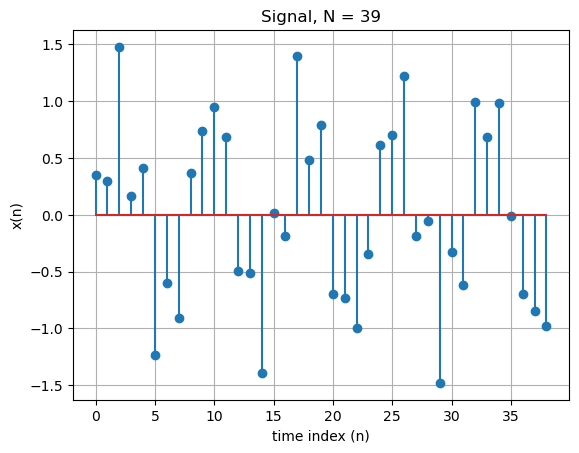

In [4]:
plt.figure()
plt.stem(n,x)
plt.grid()
plt.xlabel('time index (n)')
plt.ylabel('x(n)')
plt.title(rf'Signal, N = {N}')

#### DFT of Input Sequence

In [5]:
X = DFT(x)
# X = sp.fft.fft(x)
k = np.arange(N)


#### Display Magnitude of DFT:  |X(k)| = |DFT[x(n)]|
Since |X(k)| is an real even sequence
$$ |X(k)| = |X(N-k)|$$

Text(0.5, 1.0, 'DFT Magnitude, N = 39')

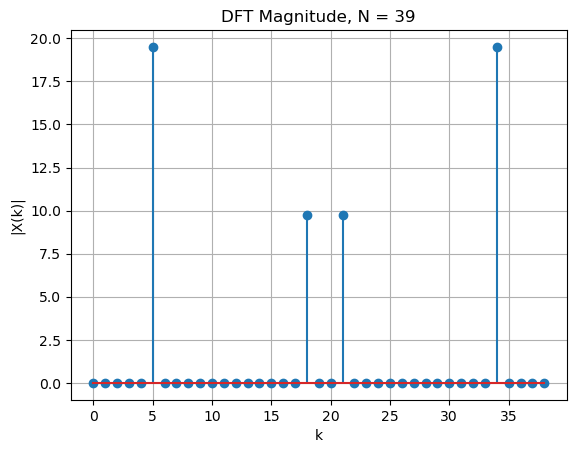

In [6]:
plt.figure()
plt.stem(k,abs(X))
plt.grid()
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.title(rf'DFT Magnitude, N = {N}')

### Magnitude Response for Positive Frequencies
Display |H(k)| between 0 to $k_{max} / N  \le 1/2$ (the relative Nyquist frequency) <br>
where $k_{max} = \left \{ \begin{matrix} N/2 & N\ even \\ (N-1)/2 & N\ odd \end{matrix} \right \}$

Text(13.0, 16.57500000000001, '$k_1 = 5.0$\n$k_2 = 18.0$')

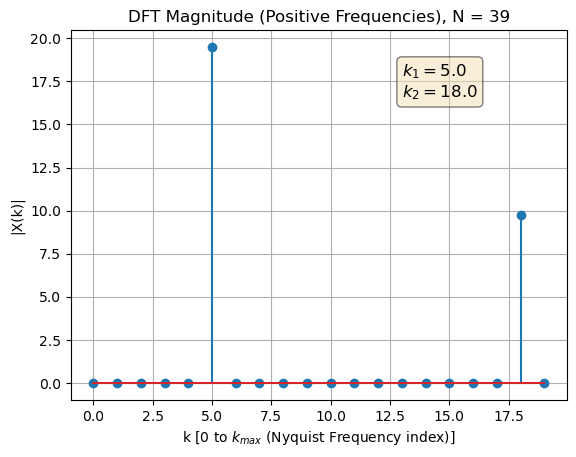

In [19]:
plt.figure()
Kd2max = int(np.floor(N/2))+1
plt.stem(k[0:Kd2max],abs(X[0:Kd2max]))
plt.grid()
plt.xlabel(r'k [0 to $k_{max}$ (Nyquist Frequency index)]')
plt.ylabel('|X(k)|')
plt.title(rf'DFT Magnitude (Positive Frequencies), N = {N}')
textstr = '\n'.join((
    r'$k_1 = %.1f$' % (k1, ),
    r'$k_2 = %.1f$' % (k2, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.65*Kd2max,0.85*max(abs(X[0:Kd2max])),textstr,fontsize=12,bbox=props)